<a href="https://colab.research.google.com/github/AdeOktavianus/MNIST-playground/blob/main/Titanic_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree

In [ ]:
df_train=pd.read_csv('/content/train.csv')
df_test=pd.read_csv('/content/test.csv')

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df_train=df_train.drop(columns='PassengerId')

In [ ]:
df_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [ ]:
df_train=df_train.drop(columns=['Cabin','Fare'])

In [ ]:
df_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,C


In [ ]:
df_train=df_train.drop(columns='Ticket')

In [ ]:
df_train['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [ ]:
df_train['relatives']=df_train['SibSp']+df_train['Parch']

In [ ]:
df_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,relatives
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,0
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,S,0
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,S,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,S,3
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,C,0


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


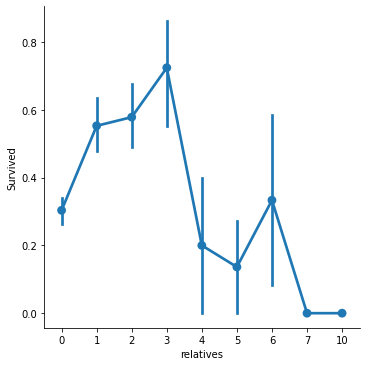

In [ ]:
plot_relatives=sns.factorplot('relatives','Survived',data=df_train)

In [ ]:
df_train=df_train.drop(columns=['SibSp','Parch'])

In [ ]:
df_train

,Survived,Pclass,Name,Sex,Age,Embarked,relatives
0,0,3,"Braund, Mr. Owen Harris",male,22.0,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,S,0
...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,S,0
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,S,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,S,3
889,1,1,"Behr, Mr. Karl Howell",male,26.0,C,0


In [ ]:
df_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
df_train=df_train.fillna(df_train.mean())

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    float64
 5   Embarked   889 non-null    object 
 6   relatives  891 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 48.9+ KB


In [ ]:
df_train=df_train.dropna()

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   889 non-null    int64  
 1   Pclass     889 non-null    int64  
 2   Name       889 non-null    object 
 3   Sex        889 non-null    object 
 4   Age        889 non-null    float64
 5   Embarked   889 non-null    object 
 6   relatives  889 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 55.6+ KB


In [ ]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
df_train['Embarked']=df_train['Embarked'].replace(to_replace='S',value=1)
df_train['Embarked']=df_train['Embarked'].replace(to_replace='C',value=2)
df_train['Embarked']=df_train['Embarked'].replace(to_replace='Q',value=3)

In [ ]:
df_train

,Survived,Pclass,Name,Sex,Age,Embarked,relatives
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,2,1
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,1
4,0,3,"Allen, Mr. William Henry",male,35.000000,1,0
...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,1,0
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,1,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,3
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,2,0


In [ ]:
sex=df_train['Sex']

In [ ]:
sex

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 889, dtype: object

In [ ]:
df_train_sex=pd.get_dummies(sex)

In [ ]:
df_train_sex

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [ ]:
df_train=df_train.join(df_train_sex)

In [ ]:
df_train

,Survived,Pclass,Name,Sex,Age,Embarked,relatives,female,male
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,1,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,2,1,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,1,0,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,1,1,0
4,0,3,"Allen, Mr. William Henry",male,35.000000,1,0,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,1,0,0,1
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,1,0,1,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,3,1,0
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,2,0,0,1


In [ ]:
df_train=df_train.drop(columns='Sex')

In [ ]:
df_train

,Survived,Pclass,Name,Age,Embarked,relatives,female,male
0,0,3,"Braund, Mr. Owen Harris",22.000000,1,1,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,2,1,1,0
2,1,3,"Heikkinen, Miss. Laina",26.000000,1,0,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,1,1,0
4,0,3,"Allen, Mr. William Henry",35.000000,1,0,0,1
...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",27.000000,1,0,0,1
887,1,1,"Graham, Miss. Margaret Edith",19.000000,1,0,1,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,3,1,0
889,1,1,"Behr, Mr. Karl Howell",26.000000,2,0,0,1


In [ ]:
df_train=df_train.drop(columns='Name')

In [ ]:
df_train

,Survived,Pclass,Age,Embarked,relatives,female,male
0,0,3,22.000000,1,1,0,1
1,1,1,38.000000,2,1,1,0
2,1,3,26.000000,1,0,1,0
3,1,1,35.000000,1,1,1,0
4,0,3,35.000000,1,0,0,1
...,...,...,...,...,...,...,...
886,0,2,27.000000,1,0,0,1
887,1,1,19.000000,1,0,1,0
888,0,3,29.699118,1,3,1,0
889,1,1,26.000000,2,0,0,1


In [ ]:
x=df_train.drop(columns='Survived')
y=df_train['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=50)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(n_estimators=100,random_state=0)

In [ ]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[170  24]
 [ 42  76]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       194
           1       0.76      0.64      0.70       118

    accuracy                           0.79       312
   macro avg       0.78      0.76      0.77       312
weighted avg       0.79      0.79      0.78       312



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=7)

In [ ]:
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [ ]:
y_pred_classifier = classifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred_classifier))  
print(classification_report(y_test, y_pred_classifier))

[[171  23]
 [ 54  64]]
              precision    recall  f1-score   support

           0       0.76      0.88      0.82       194
           1       0.74      0.54      0.62       118

    accuracy                           0.75       312
   macro avg       0.75      0.71      0.72       312
weighted avg       0.75      0.75      0.74       312



In [ ]:
from sklearn import tree

In [ ]:
clf_tree = tree.DecisionTreeClassifier()

In [ ]:
clf_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred_tree=clf_tree.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred_tree))  
print(classification_report(y_test, y_pred_tree))

[[165  29]
 [ 43  75]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       194
           1       0.72      0.64      0.68       118

    accuracy                           0.77       312
   macro avg       0.76      0.74      0.75       312
weighted avg       0.77      0.77      0.77       312



In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
clf_nb = MultinomialNB()

In [ ]:
clf_nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
y_pred_nb=clf_nb.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred_nb))  
print(classification_report(y_test, y_pred_nb))

[[167  27]
 [ 41  77]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       194
           1       0.74      0.65      0.69       118

    accuracy                           0.78       312
   macro avg       0.77      0.76      0.76       312
weighted avg       0.78      0.78      0.78       312



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = keras.Sequential()
model.add(keras.Input(shape=(6,)))
model.add(layers.Dense(100, activation="relu"))
model.add(layers.Dense(25, activation="relu"))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='Adam',metrics=['accuracy'],loss='binary_crossentropy')

In [ ]:
model.fit(X_train,y_train,epochs=1000)

Epoch 1/1000
19/19 [==============================] - 0s 1ms/step - loss: 0.6767 - accuracy: 0.5737
Epoch 2/1000
19/19 [==============================] - 0s 2ms/step - loss: 0.6171 - accuracy: 0.6880
Epoch 3/1000
19/19 [==============================] - 0s 1ms/step - loss: 0.6173 - accuracy: 0.6863
Epoch 4/1000
19/19 [==============================] - 0s 1ms/step - loss: 0.6291 - accuracy: 0.7054
Epoch 5/1000
19/19 [==============================] - 0s 1ms/step - loss: 0.5576 - accuracy: 0.7383
Epoch 6/1000
19/19 [==============================] - 0s 1ms/step - loss: 0.5433 - accuracy: 0.7487
Epoch 7/1000
19/19 [==============================] - 0s 2ms/step - loss: 0.5291 - accuracy: 0.7470
Epoch 8/1000
19/19 [==============================] - 0s 1ms/step - loss: 0.5063 - accuracy: 0.7730
Epoch 9/1000
19/19 [==============================] - 0s 2ms/step - loss: 0.5230 - accuracy: 0.7712
Epoch 10/1000
19/19 [==============================] - 0s 1ms/step - loss: 0.4826 - accuracy: 0.7782

In [ ]:
y_pred_keras=model.predict(X_test)

In [ ]:
y_pred_keras_binary = np.where(y_pred_keras < 0.5, 0, y_pred_keras)

In [ ]:
y_pred_keras_binary

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.9997859 ],
       [0.        ],
       [0.        ],
       [1.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.50400895],
       [0.99912655],
       [0.        ],
       [0.94575715],
       [0.        ],
       [0.51841354],
       [0.        ],
       [0.        ],
       [0.51857907],
       [0.        ],
       [0.        ],
       [0.99912655],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.9883288 ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.99927115],
       [0.84693205],
       [0.77770525],
       [0.        ],
       [1.        ],
       [0.        ],
       [0.        ],
       [0.   

In [ ]:
y_pred_keras_binary=np.where(y_pred_keras_binary > 0.5, 1, y_pred_keras_binary)

In [ ]:
y_pred_keras_binary

array([[0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],

In [ ]:
print(confusion_matrix(y_test, y_pred_keras_binary))  
print(classification_report(y_test, y_pred_keras_binary))

[[178  16]
 [ 48  70]]
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       194
           1       0.81      0.59      0.69       118

    accuracy                           0.79       312
   macro avg       0.80      0.76      0.77       312
weighted avg       0.80      0.79      0.79       312



In [ ]:
df_test=df_test.drop(columns='PassengerId')

In [ ]:
df_test=df_test.drop(columns=['Cabin','Fare'])

In [ ]:
df_test=df_test.drop(columns='Ticket')

In [ ]:
df_test['relatives']=df_test['SibSp']+df_test['Parch']

In [ ]:
df_test=df_test.drop(columns=['SibSp','Parch'])

In [ ]:
df_test=df_test.fillna(df_test.mean())

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   Embarked     418 non-null    object 
 6   relatives    418 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 23.0+ KB


In [ ]:
df_test['Embarked']=df_test['Embarked'].replace(to_replace='S',value=1)
df_test['Embarked']=df_test['Embarked'].replace(to_replace='C',value=2)
df_test['Embarked']=df_test['Embarked'].replace(to_replace='Q',value=3)

In [ ]:
sex=df_test['Sex']
df_test_sex=pd.get_dummies(sex)
df_test=df_test.join(df_test_sex)

In [ ]:
df_test

,PassengerId,Pclass,Name,Sex,Age,Embarked,relatives,female,male
0,892,3,"Kelly, Mr. James",male,34.50000,3,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,1,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,3,0,0,1
3,895,3,"Wirz, Mr. Albert",male,27.00000,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,2,1,0
...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,1,0,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,2,0,1,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,1,0,0,1
416,1308,3,"Ware, Mr. Frederick",male,30.27259,1,0,0,1


In [ ]:
df_test=df_test.drop(columns='Sex')
df_test=df_test.drop(columns='Name')

In [ ]:
df_test

,Pclass,Age,Embarked,relatives,female,male
0,3,34.50000,3,0,0,1
1,3,47.00000,1,1,1,0
2,2,62.00000,3,0,0,1
3,3,27.00000,1,0,0,1
4,3,22.00000,1,2,1,0
...,...,...,...,...,...,...
413,3,30.27259,1,0,0,1
414,1,39.00000,2,0,1,0
415,3,38.50000,1,0,0,1
416,3,30.27259,1,0,0,1


In [ ]:
X=df_test

In [ ]:
y_pred=clf.predict(X)
y_pred_classifier = classifier.predict(X)
y_pred_tree=clf_tree.predict(X)
y_pred_nb=clf_nb.predict(X)
y_pred_keras=model.predict(X)
y_pred_keras_binary = np.where(y_pred_keras < 0.5, 0, y_pred_keras)
y_pred_keras_binary=np.where(y_pred_keras_binary > 0.5, 1, y_pred_keras_binary)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   Embarked     418 non-null    int64  
 4   relatives    418 non-null    int64  
 5   female       418 non-null    uint8  
 6   male         418 non-null    uint8  
dtypes: float64(1), int64(4), uint8(2)
memory usage: 17.3 KB


In [ ]:
id=df_test.drop(columns=['Pclass','Age','Embarked','relatives','female','male',])

In [ ]:
y_pred_keras_binary=y_pred_keras_binary.astype(np.int64)

In [ ]:
id['Survived']=y_pred_keras_binary

In [ ]:
id

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
id.to_csv('test_result2.csv',  index = False)

In [ ]:
df_imtest = pd.read_csv('test_result2.csv')
df_imtest.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
